
# Descriptive satistics and visualization with Matplotlib

This document will utilize the `matplotlib` and `seaborn` libraries to generate fundamental visualizations in Python. Each type of visualization has its own advantages and drawbacks, making the selection of an appropriate one a common source of frustration for both content creators and readers. Be sure to make thoughtful choices! The section at the end offers some general guidance to assist in this decision-making process.

In [1]:
# Additional help: help(command), such as: help(print), help(plt.barh), help(pd.read_excel), help(np.polyfit), etc.
# tab after "."  or Shift-tab anywhere in any command. Expand the help by clicking on "+"

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell  #To execute multiple lines in a cell
InteractiveShell.ast_node_interactivity = "all"

## 1. Constructing a data frame from lists

We will use Pandas DataFrame and loc methods to construct a dataframe: df.

In [3]:
# Define and populate two lists
temperature = [14.2, 16.4, 11.9, 12.5, 18.9, 22.1, 19.4, 23.1, 25.4, 18.1, 22.6, 17.2]
sales = [215.20, 325.00, 185.20, 330.20, 418.60, 520.25, 412.20, 614.60, 544.80, 421.40, 445.50, 406.10]

In [4]:
# In case we want to remember the type of this collection (structural) data
type(sales)

list

In [5]:
# Create a DataFrame object with one column Temperature
df = pd.DataFrame(temperature, columns = ['Temperature'])

In [6]:
# Need help?
?pd.DataFrame

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will d

In [8]:
# Check the header (or the whole df) or delete the data frame if you encounter a problem
df.head()

# To see the whole data frame
# display(df)
# print(df)
# df

# Delete the data frame
#del df

# Delete a single column in a data frame
# del df["Temperature"]

,Temperature
0,14.2
1,16.4
2,11.9
3,12.5
4,18.9


In [9]:
# Add sales list as the last column of the data frame object
df.loc[:, 'Sales'] = sales

In [10]:
# Additional practice of common methods in our data frame
#df.dtypes()
#df.shape
#df.info

## 2. Descriptive statistics

Descriptive statistics is a set of brief descriptive coefficients that summarize a given data set representative of an entire or sample population.

In [11]:
# Compute average temperatures
df["Temperature"].mean()

# Avg sales in a slightly different format?


18.48333333333333

In [12]:
# Both columns' means and medians together
df[["Temperature", "Sales"]].mean()

# Or simply:

Temperature     18.483333
Sales          403.254167
dtype: float64

In [13]:
# Basic descriptive statistic can be calculated by "describe" method
df['Temperature'].describe()

# Try multiple columns

count    12.000000
mean     18.483333
std       4.304508
min      11.900000
25%      15.850000
50%      18.500000
75%      22.225000
max      25.400000
Name: Temperature, dtype: float64

In [14]:
# We can pick and choose aggregating statistics by Agg method. Syntax is a little involved though.
df.agg(
    {'Temperature': ["min", 'max', "mean", "median", "skew", 'kurt', 'std']})

# Try multiple columns



,Temperature
min,11.900000
max,25.400000
mean,18.483333
median,18.500000
skew,-0.057610
kurt,-0.948878
std,4.304508


In [15]:
# Yet another way
from scipy import stats
stats.describe(df.Temperature)

DescribeResult(nobs=12, minmax=(11.9, 25.4), mean=18.48333333333333, variance=18.52878787878788, skewness=-0.050142995905028576, kurtosis=-1.0587346942653864)

In [29]:
# Same method works with lists as well as NumPy arrays
stats.describe(sales)

DescribeResult(nobs=12, minmax=(185.2, 614.6), mean=403.2541666666668, variance=15927.320662878787, skewness=-0.1853695422482174, kurtosis=-0.5899816060520142)

## 3. Scatter plot

Opting for scatter plots is an excellent choise for visualizing indepedent data points.

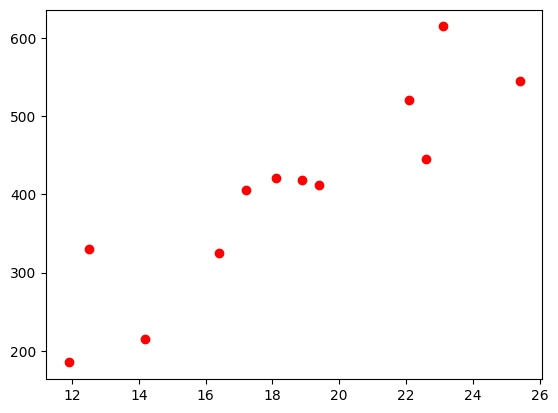

In [30]:
# Scatter plot
plt.scatter(temperature, sales, color='red')
#plt.scatter(sales, temperature, color='blue')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

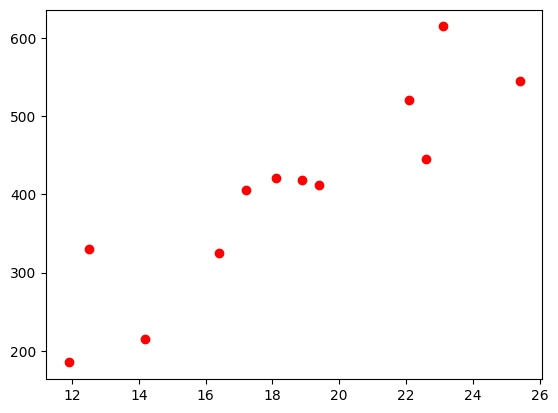

In [31]:
# Add title and axis labels
#plt.title('Ice-cream sales vs. Temperature')
#plt.xlabel('Temperature')
#plt.ylabel('Sales')
plt.scatter(temperature, sales, color='red')

# Linear trendline
#z = np.polyfit(temperature, sales, 1)
#p = np.poly1d(z)

#add trendline to plot
#plt.plot(temperature, p(temperature))

plt.show

In [32]:
?np.polyfit
#help(np.polyfit)

Signature:       np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Call signature:  np.polyfit(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function polyfit at 0x10f923100>
File:            /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/polynomial.py
Docstring:      
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the 

## 4. Line plot

Line plots are useful when visualizing data points that are connected in some meaningful way over the x-axis (e.g. repeated measurements over time), especially for time-series graphs.

In [33]:
stock_price = [190.64, 190.09, 192.25, 191.79, 194.45, 196.45, 196.45, 196.42, 200.32, 200.32, 
               200.85, 199.2, 199.2, 199.2, 199.46, 201.46, 197.54, 201.12, 203.12, 203.12, 203.12, 202.83, 202.83, 203.36, 206.83, 204.9, 204.9, 204.9, 204.4, 204.06]

In [34]:
type(stock_price)

list

Text(0.5, 1.0, 'Opening Stock Prices')

Text(0.5, 0, 'Days')

Text(0, 0.5, '$ USD')

NameError: name 'p' is not defined

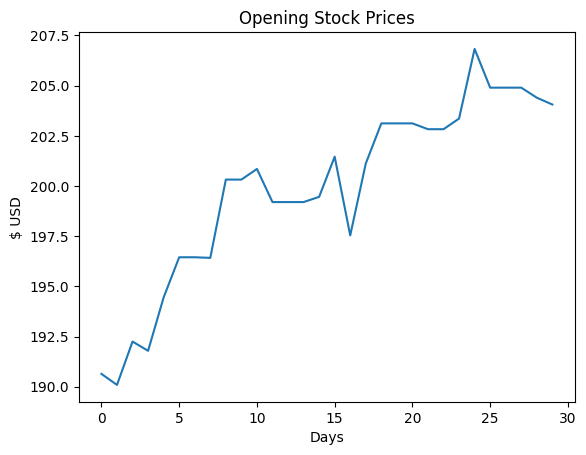

In [38]:
plt.plot(stock_price)
#plt.title('Opening Stock Prices')
#plt.xlabel('Days')
#plt.ylabel('$ USD')

#t = list(range(1, 31))

#plt.plot(t, p(t))

plt.show

In [36]:
# Add linear trendline then extend it for higher (polynomial) degrees
z = np.polyfit(t, stock_price, 1)
p = np.poly1d(z)

NameError: name 't' is not defined

In [37]:
# Just to remember the Range 
t = list(range(1, 31))
print(t)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


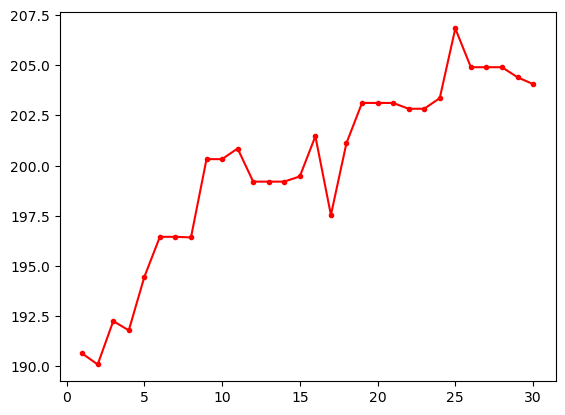

In [297]:
plt.plot(t, stock_price, marker='.', color='red')  # Change the marker types
#plt.xticks([1, 8, 15, 22, 28])
plt.show()

## 5. Bar plot

Bar plots are generally useful in portraying counts of items across categories (each with its own bar), such as histograms.

In [111]:
grades = ['A', 'B', 'C', 'D', 'F', 'I']
students_count = [19, 30, 10, 5, 9, 2]

In [112]:
# function to add value labels
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

<BarContainer object of 6 artists>

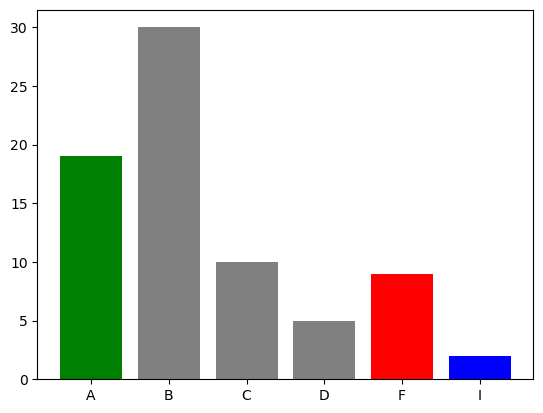

In [117]:
#

plt.bar(grades, students_count, color=['green', 'gray', 'gray', 'gray', 'red', 'blue'])

<BarContainer object of 6 artists>

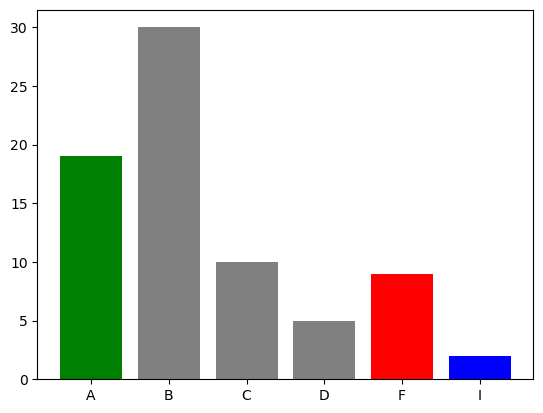

In [284]:
#plt.title('Grades Bar Plot for Python Class')
#plt.xlabel('Grade')
#plt.ylabel('Num Students')
plt.bar(grades, students_count, color=['green', 'gray', 'gray', 'gray', 'red', 'blue'])
# calling the function to add value labels
#addlabels(grades, students_count)
plt.show()

<BarContainer object of 6 artists>

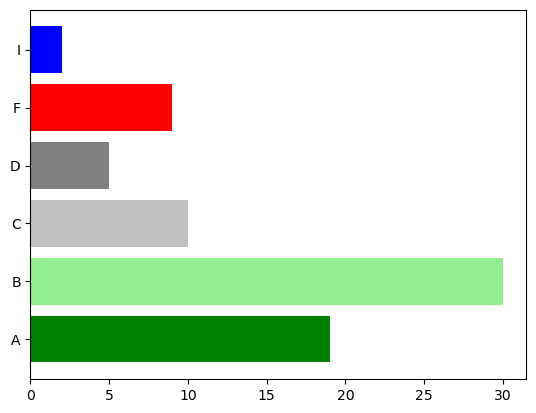

In [285]:
# Horizontal bar plot
plt.barh(grades, students_count, color=['green', 'lightgreen', 'silver', 'gray', 'red', 'blue'])

# Add labels as we did above

## 6. Pie chart

While pie charts effectively communicate fractional data and percentages, they pose challenges when comparing relative proportions across numerous categories. In such cases, opting for a bar chart or a table can facilitate more precise comparisons between categories.

In [298]:
labels = ['Selma', 'Serra', 'Oswald']
votes = [203, 140, 98] # Note that this does not need to be percentages

([<matplotlib.patches.Wedge at 0x195aa4abe50>,
 [Text(0.13677806700190426, 1.0914631282765455, 'Selma'),
  Text(-0.8063570223196342, -0.7481900510938466, 'Serra'),
  Text(0.8426489499534077, -0.7070662961437348, 'Oswald')],
 [Text(0.07460621836467504, 0.5953435245144792, '46.0%'),
  Text(-0.4398311030834368, -0.4081036642330072, '31.7%'),
  Text(0.45962669997458594, -0.3856725251693099, '22.2%')])

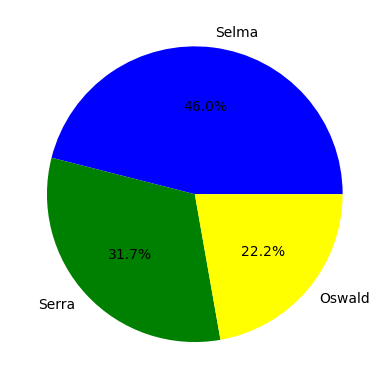

In [300]:
plt.pie(votes, labels=labels, autopct='%1.1f%%', colors=['blue', 'green', 'yellow'])

Text(0.5, 1.0, 'Voting Results: Club President')

([<matplotlib.patches.Wedge at 0x195aa4ebe90>,
 [Text(0.13677806700190426, 1.0914631282765455, 'Selma'),
  Text(-0.8063570223196342, -0.7481900510938466, 'Serra'),
  Text(0.8426489499534077, -0.7070662961437348, 'Oswald')],
 [Text(0.07460621836467504, 0.5953435245144792, '46.0%'),
  Text(-0.4398311030834368, -0.4081036642330072, '31.7%'),
  Text(0.45962669997458594, -0.3856725251693099, '22.2%')])

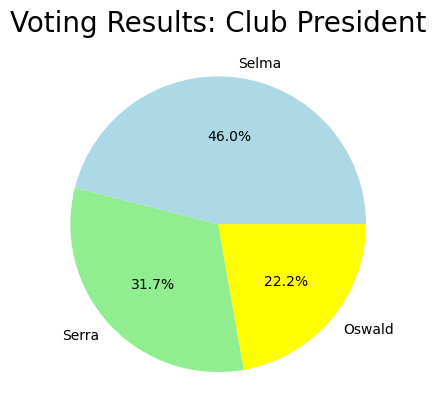

In [301]:
plt.title('Voting Results: Club President', fontdict={'fontsize': 20})
plt.pie(votes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'yellow'])
plt.show()

## 7. Heat map

It is often desirable to show data which depends on two independent variables as a color coded image plot. This is often referred to as a heatmap. If the data is categorical, this would be called a categorical heatmap, which is an excellent visualization for illustrating the relationship.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Harvest of local farmers (in tons/year)')

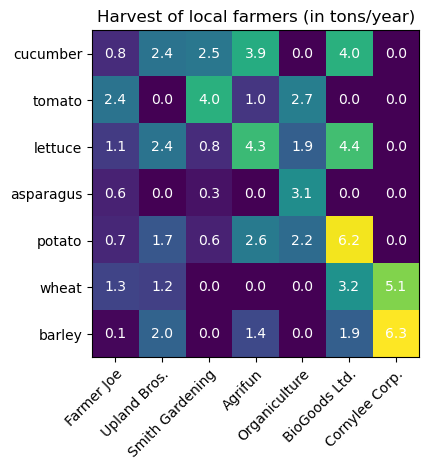

In [302]:
#import matplotlib.pyplot as plt
#import numpy as np

#import matplotlib
#import matplotlib as mpl


vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [303]:
type(harvest)

numpy.ndarray

In [304]:
# Rest of the Heat map exercise cells are to illustrate how to "recycle" code from public domain.
# You won't be responsible from this code.
# First, we will define a heatmap function.
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar

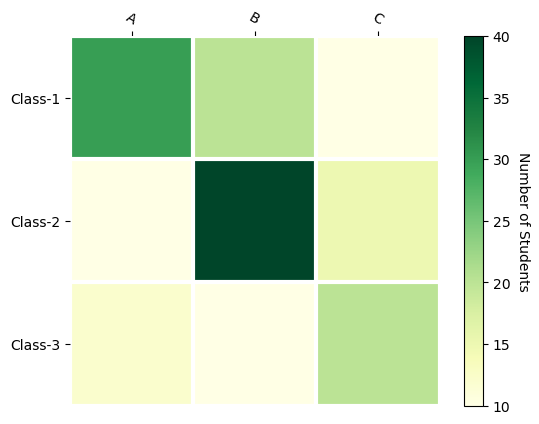

In [305]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
    [30, 20, 10,],
    [10, 40, 15],
    [12, 10, 20]
])

im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')


Notice that we used a `numpy` array to store the data for the heatmap?  More on this later...

It would be helpful to be able to provide more information about the particular values corresponding to each color.  To accomplish this, we can define another function (below) that does this. 

In [309]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    import matplotlib
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

C:\Users\okazan\AppData\Local\Temp\ipykernel_36800\2292961765.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  kw.update(color=textcolors[im.norm(data[i, j]) > threshold])


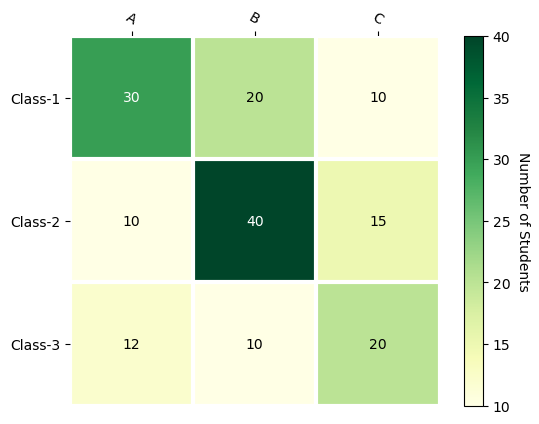

In [310]:
im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')
texts = annotate_heatmap(im, valfmt="{x}")

## 8. Histogram and density plot w/ Seaborn

When visualizing the distribution of a continuous variable, histograms and density plots are a great option.

<Axes: ylabel='Count'>

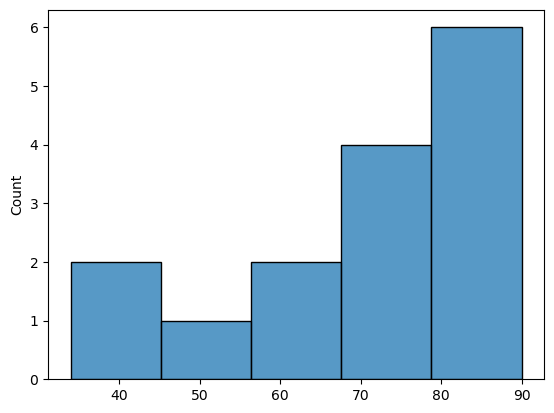

In [312]:
data = [90, 80, 50, 42, 89, 78, 34, 70, 67, 73, 74, 80, 60, 90, 90]
sns.histplot(data) #, kde = True)

Text(0.5, 1.0, 'Density Plot')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Density')

<AxesSubplot: title={'center': 'Density Plot'}, xlabel='Score', ylabel='Density'>

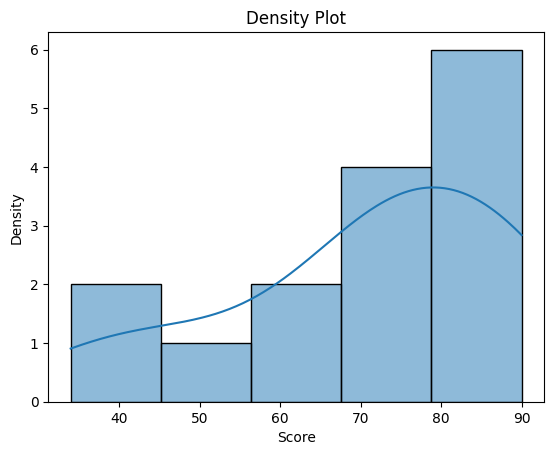

In [7]:
#plt.title('Density Plot')
#plt.xlabel('Score')
#plt.ylabel('Density')
#sns.histplot(data,kde=True)
#plt.show()